논문: https://arxiv.org/abs/1805.00794
캐글: https://www.kaggle.com/datasets/shayanfazeli/heartbeat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기

In [2]:
df_test = pd.read_csv('mitbih_test.csv', header=None)
df_train = pd.read_csv('mitbih_train.csv', header=None)

In [3]:
len(df_test), len(df_train)

(21892, 87554)

In [4]:
df_all = pd.concat([df_test, df_train])
df_all

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [5]:
# 마지막 열이 라벨링
df_all.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
79211,0.000000,0.037217,0.082524,0.144013,0.260518,0.318770,0.406149,0.451456,0.508091,0.543689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49794,0.932836,0.848259,0.386816,0.000000,0.166667,0.238806,0.194030,0.185323,0.191542,0.187811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11219,1.000000,0.896661,0.297297,0.017488,0.265501,0.354531,0.321145,0.308426,0.319555,0.325914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75902,1.000000,0.954887,0.766917,0.498747,0.320802,0.305764,0.255639,0.240602,0.203008,0.192982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
52194,1.000000,0.979540,0.777494,0.319693,0.104859,0.166240,0.112532,0.063939,0.048593,0.061381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38319,0.910714,0.821429,0.696429,0.452381,0.184524,0.136905,0.154762,0.154762,0.166667,0.148810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14328,1.000000,0.942029,0.724638,0.565217,0.376812,0.285024,0.323671,0.342995,0.328502,0.328502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16877,0.984762,0.876190,0.695238,0.514286,0.283810,0.116190,0.036190,0.028571,0.041905,0.070476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15328,1.000000,0.565558,0.228963,0.213307,0.109589,0.000000,0.001957,0.066536,0.164384,0.238748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60972,0.000000,0.094675,0.239645,0.357988,0.461538,0.532544,0.668639,0.751479,0.778107,0.775148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 각 타입별 분포 종류 확인
df_all.iloc[:,-1].value_counts()

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64

# 시각화

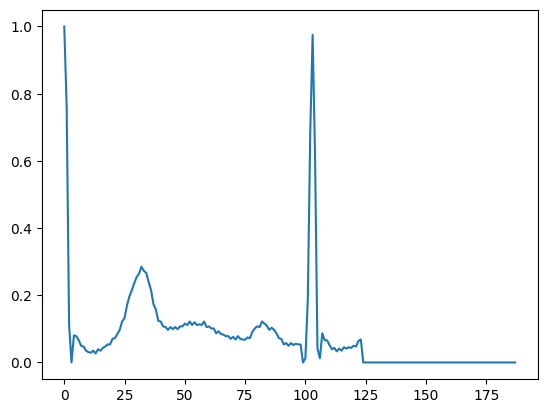

In [7]:
plt.plot(df_all.iloc[0,:])

# 데이터 전처리

In [8]:
x_data = df_all.iloc[:,:-1]

In [9]:
y_data = df_all.iloc[:,-1]

In [10]:
x_data.shape, y_data.shape

((109446, 187), (109446,))

In [11]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,             
                                                    y_data,             
                                                    test_size = 0.3,    
                                                    shuffle=True,       
                                                    stratify=y_data,    
                                                    random_state = 1)   

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76612, 187), (32834, 187), (76612,), (32834,))

In [13]:
# 원핫 인코딩 진행
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
y_train, y_test

(array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.]], dtype=float32),
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        ...,
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]], dtype=float32))

In [15]:
rounded_y_train = np.argmax(y_train, axis=-1)
rounded_y_test = np.argmax(y_test, axis=-1)

In [16]:
# 다루기 전 것도 가지고 있기
rounded_y_train, rounded_y_test

(array([0, 0, 2, ..., 0, 0, 4], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [17]:
# 잘 섞인 것을 확인할 수 있음
rounded_y_train[:100]

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 4], dtype=int64)

In [19]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
41125,1.000000,0.915989,0.390244,0.000000,0.121951,0.246612,0.289973,0.276423,0.276423,0.319783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31723,1.000000,0.381890,0.039370,0.251969,0.393701,0.421260,0.425197,0.440945,0.444882,0.429134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75600,0.652406,0.500891,0.262032,0.115865,0.074866,0.003565,0.000000,0.003565,0.028520,0.067736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47449,0.000000,0.180556,0.325000,0.455556,0.513889,0.508333,0.530556,0.544444,0.544444,0.541667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13478,0.137143,0.531429,0.571429,0.000000,0.171429,0.462857,0.531429,0.514286,0.588571,0.582857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31927,1.000000,0.931330,0.431330,0.000000,0.150215,0.193133,0.109442,0.083691,0.096567,0.098712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15011,0.951219,0.938086,0.459662,0.073171,0.050657,0.091932,0.088180,0.073171,0.061914,0.067542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7272,0.976546,0.916844,0.720682,0.560768,0.330490,0.149254,0.034115,0.023454,0.031983,0.072495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28043,1.000000,0.871314,0.262735,0.029491,0.075067,0.058981,0.032172,0.037534,0.024129,0.037534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 논문 구현

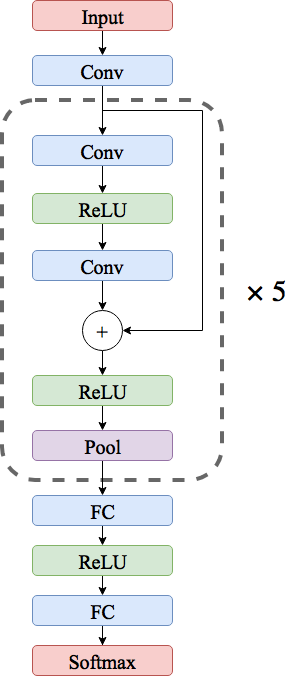

In [30]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, ReLU, Input, Flatten, Dense, Add, BatchNormalization
from tensorflow.keras.models import Model

# residual block 정의하기
def residual_block(x):
    # Define the two Conv1D layers in the residual block
    y = Conv1D(filters=32, kernel_size=5, padding='same')(x)
    y = BatchNormalization()(y)
    y = ReLU()(y)
    
    y = Conv1D(filters=32, kernel_size=5, padding='same')(y)
    y = BatchNormalization()(y)
    
    # Residual skip connection 추가 (residual 값 더하는 과정)
    y = Add()([y, x])
    
    # ReLU 추가, MaxPooling 추가
    y = ReLU()(y)
    y = MaxPool1D(5, 2)(y)
    
    return y

# Input Layer 정의
inputs = Input(shape=(187, 1))

# COnv1D 통과
x = Conv1D(filters=32, kernel_size=5, strides=1)(inputs)

# 5 residual blocks 통과
x = residual_block(x)
x = residual_block(x)
x = residual_block(x)
x = residual_block(x)
x = residual_block(x)

# residual blocks 값 Flatten
x = Flatten()(x)

# FC 레이어, ReLU
x = Dense(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# softmax 레이어 - 총 5가지 분류
outputs = Dense(5, activation='softmax')(x)

# 모델 정의
model = Model(inputs, outputs)

In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 187, 1)]     0           []                               
                                                                                                  
 conv1d_11 (Conv1D)             (None, 183, 32)      192         ['input_2[0][0]']                
                                                                                                  
 conv1d_12 (Conv1D)             (None, 183, 32)      5152        ['conv1d_11[0][0]']              
                                                                                                  
 batch_normalization_10 (BatchN  (None, 183, 32)     128         ['conv1d_12[0][0]']              
 ormalization)                                                                              

 conv1d_20 (Conv1D)             (None, 8, 32)        5152        ['max_pooling1d_8[0][0]']        
                                                                                                  
 batch_normalization_18 (BatchN  (None, 8, 32)       128         ['conv1d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 re_lu_18 (ReLU)                (None, 8, 32)        0           ['batch_normalization_18[0][0]'] 
                                                                                                  
 conv1d_21 (Conv1D)             (None, 8, 32)        5152        ['re_lu_18[0][0]']               
                                                                                                  
 batch_normalization_19 (BatchN  (None, 8, 32)       128         ['conv1d_21[0][0]']              
 ormalizat

* Learning Rate Decay

In [32]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math

def lr_schedule(epoch):
    # floor 내림  ex) math.floor(3.5) ->3
    # 0.1^(epoch 10의 배수마다 내림)
    # 10의 배수마다 0.1에 제곱한 값을 0.001에 곱해 learning rate를 낮춤
    lr = 0.001 * math.pow(0.1, math.floor(epoch / 10))
    return lr

print('예시')
print(lr_schedule(9), lr_schedule(10), lr_schedule(19), lr_schedule(20))

# lr_scheduler에 집어넣기
lr_scheduler = LearningRateScheduler(lr_schedule)

예시
0.001 0.0001 0.0001 1.0000000000000003e-05


In [33]:
from tensorflow.keras.optimizers import Adam, SGD, Adagrad

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

* Early Stopping & Best model save

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

filepath = "best_model.h5"
# early_stopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
# 체크포인트 설정
model_checkpoint = ModelCheckpoint(filepath, save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min')

In [35]:
# gpu 사용
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

with tf.device(device_name):
    history = model.fit(x=X_train,
                          y=y_train,           
                          validation_split= 0.3,
                          batch_size=128,         
                          epochs=70,            
                          verbose=2,
                        callbacks=[lr_scheduler, early_stopping, model_checkpoint])

/device:GPU:0
Epoch 1/70
419/419 - 182s - loss: 0.2621 - accuracy: 0.9379 - val_loss: 0.8926 - val_accuracy: 0.7008 - lr: 0.0010 - 182s/epoch - 435ms/step
Epoch 2/70
419/419 - 183s - loss: 0.1032 - accuracy: 0.9732 - val_loss: 0.1189 - val_accuracy: 0.9684 - lr: 0.0010 - 183s/epoch - 436ms/step
Epoch 3/70
419/419 - 183s - loss: 0.0864 - accuracy: 0.9765 - val_loss: 0.1155 - val_accuracy: 0.9685 - lr: 0.0010 - 183s/epoch - 436ms/step
Epoch 4/70
419/419 - 181s - loss: 0.0737 - accuracy: 0.9792 - val_loss: 0.1019 - val_accuracy: 0.9725 - lr: 0.0010 - 181s/epoch - 432ms/step
Epoch 5/70
419/419 - 180s - loss: 0.0668 - accuracy: 0.9817 - val_loss: 0.0795 - val_accuracy: 0.9764 - lr: 0.0010 - 180s/epoch - 429ms/step
Epoch 6/70
419/419 - 179s - loss: 0.0608 - accuracy: 0.9822 - val_loss: 0.0770 - val_accuracy: 0.9784 - lr: 0.0010 - 179s/epoch - 428ms/step
Epoch 7/70
419/419 - 180s - loss: 0.0574 - accuracy: 0.9836 - val_loss: 0.0624 - val_accuracy: 0.9826 - lr: 0.0010 - 180s/epoch - 430ms/step

In [36]:
# 정확도 측정
model.evaluate(X_test, y_test)

1027/1027 [==============================] - 20s 18ms/step - loss: 0.0470 - accuracy: 0.9882


[0.04700787365436554, 0.9882438778877258]

In [40]:
# 저장한 모델 불러오기
from tensorflow.keras.models import load_model

filepath = "best_model.h5"
model = load_model(filepath)

model.evaluate(X_test, y_test)

1027/1027 [==============================] - 16s 15ms/step - loss: 0.0445 - accuracy: 0.9878


[0.04450021684169769, 0.987756609916687]

In [42]:
predictions = model.predict(X_test)

In [43]:
predictions

array([[9.9999821e-01, 1.7239096e-06, 7.3037607e-09, 5.1929403e-09,
        1.3405715e-07],
       [9.9980015e-01, 1.9939186e-04, 1.0801186e-07, 2.0401568e-07,
        1.7437111e-07],
       [9.9987137e-01, 1.2811339e-04, 9.7239351e-08, 4.3224166e-08,
        3.7293003e-07],
       ...,
       [9.9999368e-01, 6.2988224e-06, 6.0995803e-10, 5.8720995e-10,
        3.8207311e-08],
       [9.9991894e-01, 8.0735474e-05, 1.7728132e-08, 3.1265972e-07,
        1.6055090e-08],
       [9.9996853e-01, 2.8303080e-05, 4.9720279e-07, 2.6007799e-06,
        8.3527254e-08]], dtype=float32)

In [44]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [45]:
rounded_y_test = np.argmax(y_test, axis=-1)

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_y_test, rounded_predictions)

In [47]:
cm

array([[27047,    64,    43,    11,    12],
       [  101,   717,    11,     0,     4],
       [   46,    11,  2089,    18,     7],
       [   34,     2,    19,   186,     0],
       [   14,     0,     5,     0,  2393]], dtype=int64)